In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
diabetes_x_train=pd.read_csv('Downloads/Diabetes_XTrain.csv')
diabetes_y_train=pd.read_csv('Downloads/Diabetes_YTrain.csv')
print(diabetes_x_train.shape)
print(diabetes_y_train.shape)

(576, 8)
(576, 1)


In [10]:
diabetes_x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [12]:
diabetes_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Outcome  576 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [6]:
diabetes_x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.758681,3.328783,0.000,1.00000,3.0000,6.00000,17.00
Glucose,576.0,119.975694,31.512914,0.000,99.00000,116.0000,139.00000,199.00
BloodPressure,576.0,68.826389,20.285812,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,576.0,20.364583,15.893856,0.000,0.00000,22.0000,32.00000,63.00
Insulin,576.0,76.166667,109.193550,0.000,0.00000,36.0000,120.00000,744.00
BMI,576.0,31.857292,8.134926,0.000,26.97500,32.0000,36.72500,67.10
DiabetesPedigreeFunction,576.0,0.481519,0.336910,0.078,0.24775,0.3815,0.64125,2.42
Age,576.0,32.954861,11.878137,21.000,24.00000,29.0000,40.00000,81.00


In [58]:
diabetes_x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [8]:
diabetes_x_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

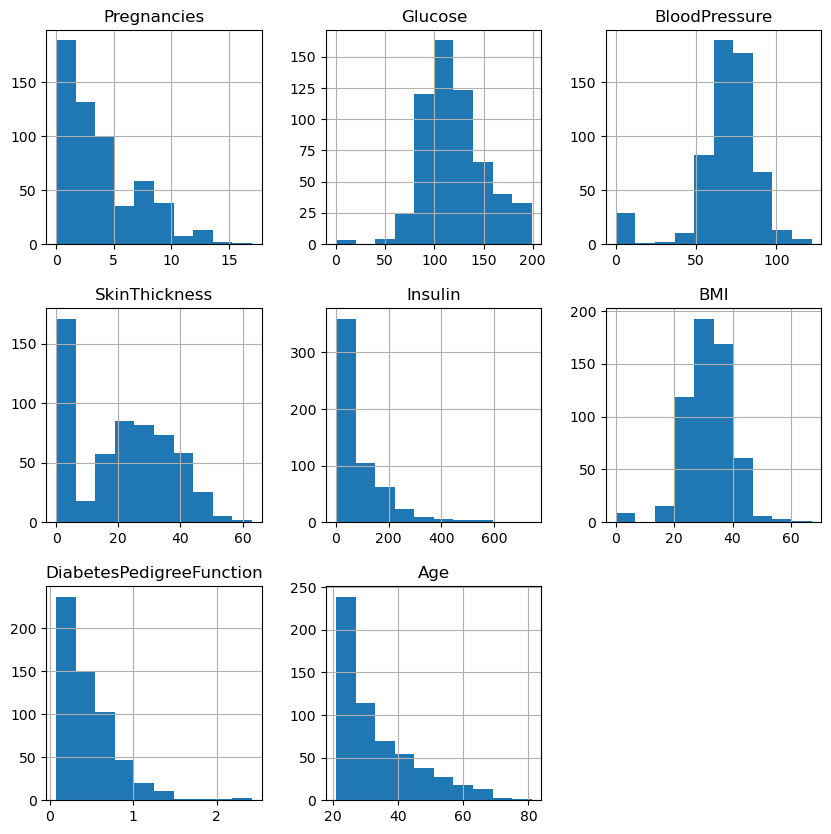

In [16]:
p=diabetes_x_train.hist(figsize=(10,10))

Outcome
0    375
1    201
Name: count, dtype: int64


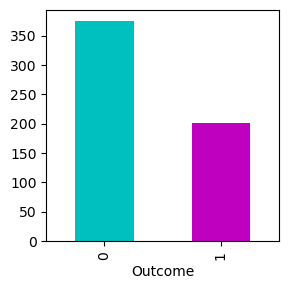

In [55]:
print(diabetes_y_train.Outcome.value_counts())
plt.figure(figsize=(3,3))
p=diabetes_y_train.Outcome.value_counts().plot(kind='bar',color=['c','m'])
plt.show()

In [132]:
#from sklearn.preprocessing import StandardScaler

In [107]:
#ss=StandardScaler()
#x=pd.DataFrame(ss.fit_transform(diabetes_x_train),columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       #'BMI', 'DiabetesPedigreeFunction', 'Age'])
x=diabetes_x_train
y=diabetes_y_train.iloc[:,-1]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [219]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [221]:
x_test=pd.read_csv('Downloads/Diabetes_Xtest.csv')
y_pred=knn.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0], dtype=int64)

In [223]:
print(y_test)

573    0
38     0
206    1
346    0
286    0
      ..
362    0
344    1
108    1
387    1
41     0
Name: Outcome, Length: 116, dtype: int64


In [225]:
from sklearn.metrics import confusion_matrix,classification_report

In [227]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48 26]
 [21 21]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        74
           1       0.45      0.50      0.47        42

    accuracy                           0.59       116
   macro avg       0.57      0.57      0.57       116
weighted avg       0.61      0.59      0.60       116



In [229]:
error_rate=[]
for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict=knn.predict(x_test)
    error_rate.append(np.mean(predict!=y_test))

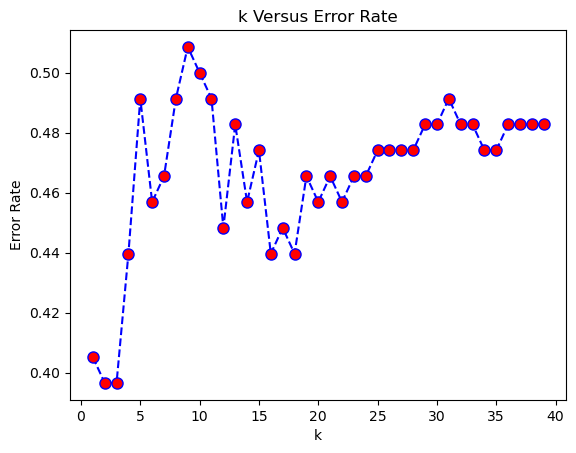

In [231]:
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', markersize=8, markerfacecolor='red', marker='o')
plt.title('k Versus Error Rate')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [233]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[48 26]
 [21 21]]
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        74
           1       0.45      0.50      0.47        42

    accuracy                           0.59       116
   macro avg       0.57      0.57      0.57       116
weighted avg       0.61      0.59      0.60       116



In [252]:
xtest=pd.read_csv('Downloads/Diabetes_Xtest.csv')
xtest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,180,90,26,90,36.5,0.314,35
1,2,93,64,32,160,38.0,0.674,23
2,2,114,68,22,0,28.7,0.092,25
3,13,76,60,0,0,32.8,0.180,41
4,1,80,74,11,60,30.0,0.527,22


In [254]:
xtest['predicted']=y_pred

In [258]:
xtest.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,predicted
0,0,180,90,26,90,36.5,0.314,35,1
1,2,93,64,32,160,38.0,0.674,23,0
2,2,114,68,22,0,28.7,0.092,25,0
3,13,76,60,0,0,32.8,0.180,41,0
4,1,80,74,11,60,30.0,0.527,22,0
5,5,137,108,0,0,48.8,0.227,37,0
6,1,153,82,42,485,40.6,0.687,23,1
7,6,98,58,33,190,34.0,0.430,43,0
8,2,92,62,28,0,31.6,0.130,24,0
9,3,111,56,39,0,30.1,0.557,30,0


predicted
0    69
1    47
Name: count, dtype: int64


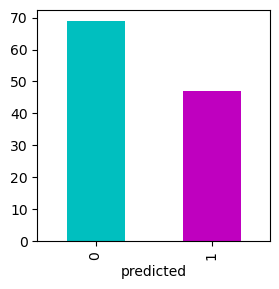

In [260]:
print(xtest.predicted.value_counts())
plt.figure(figsize=(3,3))
p=xtest.predicted.value_counts().plot(kind='bar',color=['c','m'])
plt.show()